# Breast Cancer SVM Classification

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# Add as needed

In [15]:
c = ['menopaus','agegrp', 'density', 'race', 'Hispanic','bmi', 'agefirst', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'training', 'count']
bc = pd.read_fwf('risk_rand.txt', delimiter = ' ', names = c)

In [16]:
bc.head()

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,training,count
0,0,1,1,1,0,1,0,0,0,0,9,9,0,0,1,3
1,0,1,1,1,0,1,0,0,0,9,9,9,0,0,0,2
2,0,1,1,1,0,1,0,0,0,9,9,9,0,0,1,3
3,0,1,1,1,0,1,1,0,0,0,9,9,0,0,1,1
4,0,1,1,1,0,1,1,0,1,9,9,9,0,0,1,1


<AxesSubplot:>

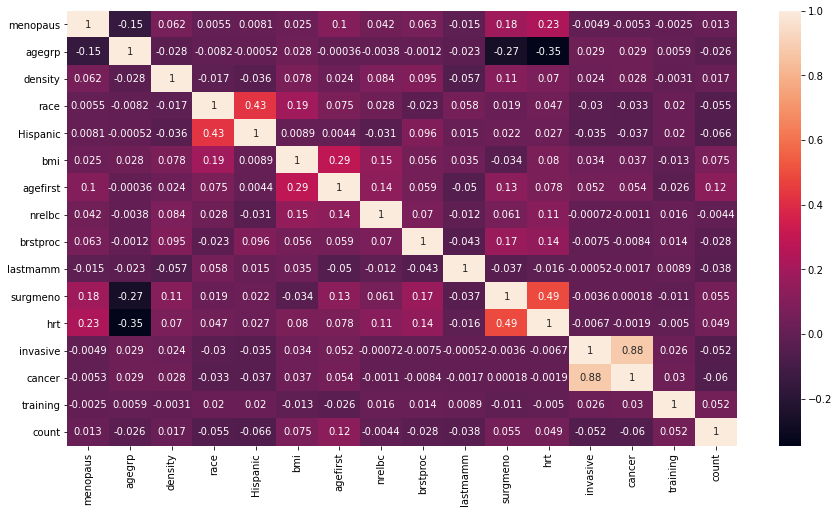

In [17]:
# Features
# column 1-13
plt.figure(figsize = (15,8) )
sns.heatmap(bc.corr(), annot=True)

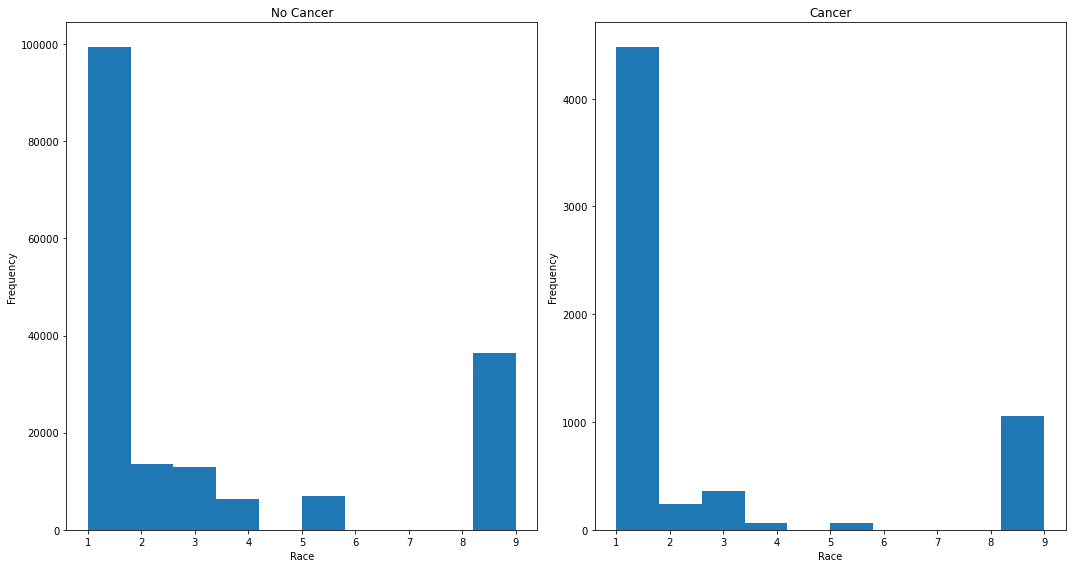

In [50]:
Cancer0 = bc[bc['cancer'] == 0]
Cancer1 = bc[bc['cancer'] == 1]

plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.hist(Cancer0['race']);
plt.title('No Cancer')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['race']);
plt.title('Cancer')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.tight_layout()

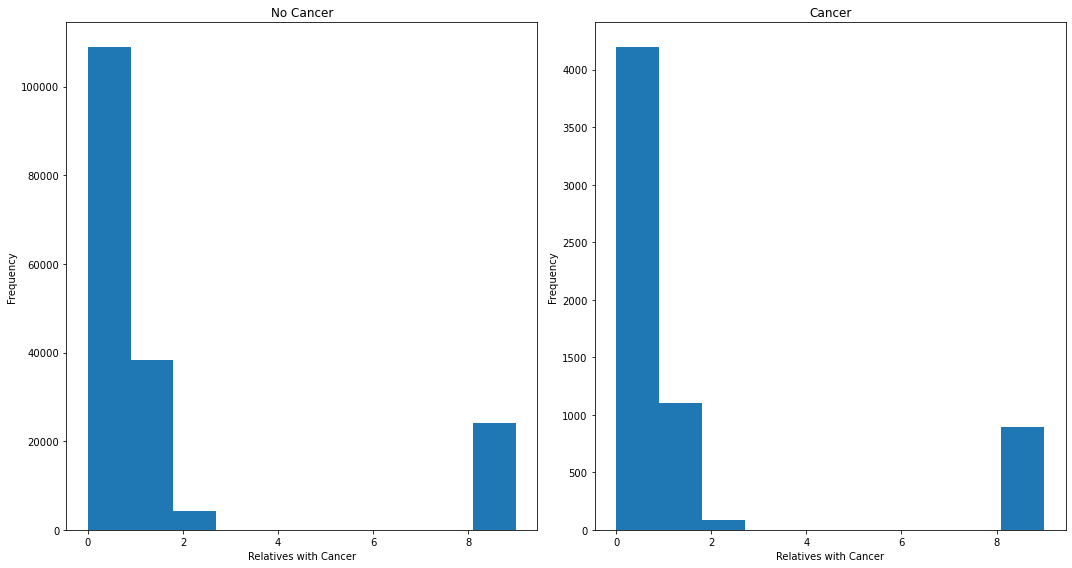

In [51]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.hist(Cancer0['nrelbc']);
plt.title('No Cancer')
plt.xlabel('Relatives with Cancer')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['nrelbc']);
plt.title('Cancer')
plt.xlabel('Relatives with Cancer')
plt.ylabel('Frequency')
plt.tight_layout()

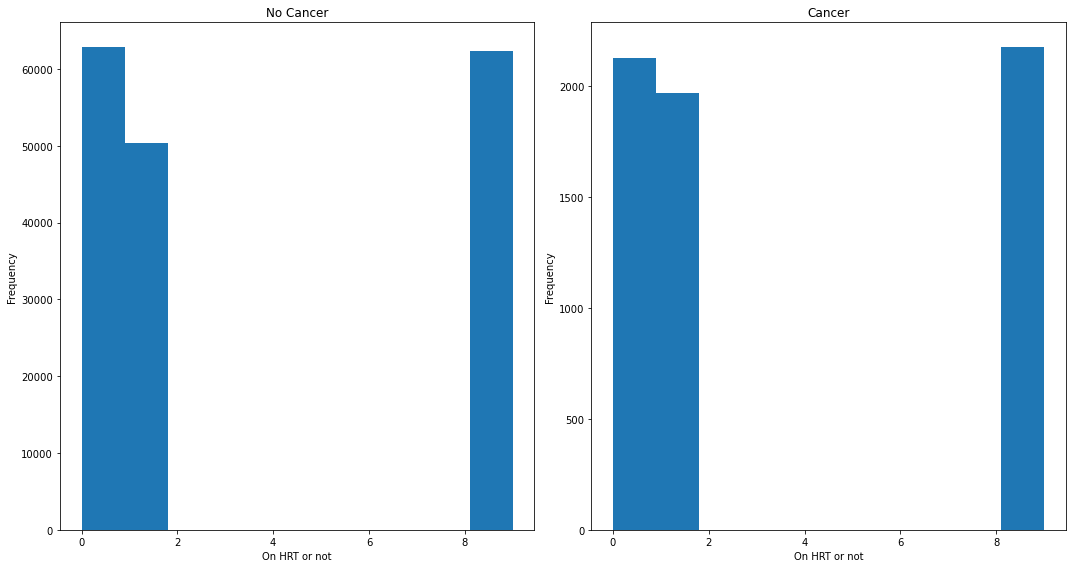

In [52]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.hist(Cancer0['hrt']);
plt.title('No Cancer')
plt.xlabel('On HRT or not')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['hrt']);
plt.title('Cancer')
plt.xlabel('On HRT or not')
plt.ylabel('Frequency')
plt.tight_layout()

# Linear Regression 

In [55]:
x = bc['invasive'].values
y = bc['cancer'].values

x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()
print("Intercept and slope are:", results.params)


Intercept and slope are: [0.00769531 0.99230469]


In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 6.334e+05
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:34:27   Log-Likelihood:             1.8776e+05
No. Observations:              181903   AIC:                        -3.755e+05
Df Residuals:                  181901   BIC:                        -3.755e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.000     37.558      0.000       0.007       0.008
x1             0.9923      0.001    795.859      0.000       0.990       0.995
==============================================================================
Omnibus:                   298845.609   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        129123057.695
Skew:                          11.423   Prob(JB):                         0.00
Kurtosis:                     131.508   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression

In [59]:
Multiple = bc.drop(['count','training' ], axis = 1)
X = Multiple.drop(['cancer'], axis = 1)


Y = Multiple['cancer']

model2 = sm.OLS(Y, X)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 cancer   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                          5.104e+04
Date:                Thu, 06 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:41:22   Log-Likelihood:                      1.8787e+05
No. Observations:              181903   AIC:                                 -3.757e+05
Df Residuals:                  181890   BIC:                                 -3.756e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

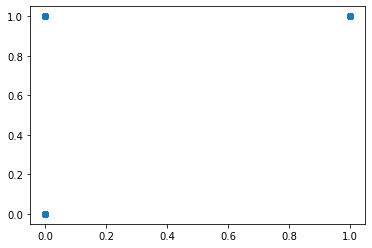

In [62]:
plt.scatter(bc['invasive'], bc['cancer'])


# Linear Models (R) Geom_Jitter